In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

**Reading the Dataset**

In [12]:
data_read = pd.read_csv("weatherAUS.csv")

In [13]:
data_read.shape

(145460, 23)

In [14]:
#Getting idea about the dataset by previewing it.

data_read.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [15]:
#Getting complete info about the dataset by identifying the types of variables.

data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [16]:
#Identifing the number of missing values each attribute has in the dataset.

data_read.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
#Droping the rows with more than 70% missing values

data_read.dropna(thresh = 16, inplace = True)
data_read.shape

(140779, 23)

In [18]:
#PLotting line graph before dropping dates

figure = px.line(data_read, x = "Date", y = ["Evaporation"], template = 'plotly_dark')
figure.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

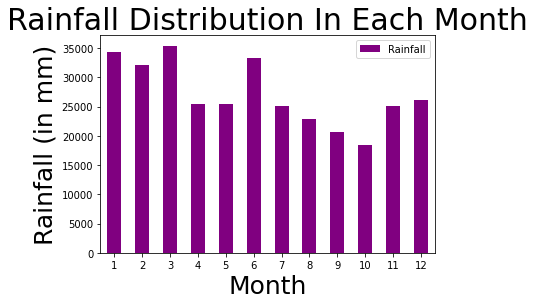

In [25]:
# Rainfall distribution in each month in Australia
data_read['Date'] = pd.to_datetime(data_read['Date'])
# Create a new dataframe rains
rain_fall =[data_read['Date'].dt.year, data_read['Date'].dt.month, data_read['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rains = pd.concat(rain_fall, axis=1, keys=headers)

plt.figure(figsize=(8,4))
a = rains.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Rainfall Distribution In Each Month', fontsize=30)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Rainfall (in mm)', fontsize=25)
plt.xticks(rotation=0)

In [26]:
#Droping the Date attribute as well, because it wouldn't help us in the analysis.

data_read.drop(labels = "Date", axis = 1, inplace = True)

In [28]:
#Dividing the data into numerical and categorical.

categ_data = [var for var in data_read.columns if data_read[var].dtype=='O']

numeri_data = [var for var in data_read.columns if data_read[var].dtype=='float']

In [29]:
numeri_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [30]:
categ_data

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [32]:
for jai in numeri_data:
    data_read[jai].fillna(value = data_read[jai].mean(),inplace = True)

In [34]:
data_read.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6966
WindGustSpeed       0
WindDir9am       8185
WindDir3pm       1239
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1886
RainTomorrow     2029
dtype: int64

In [35]:
#It gives us the Wind Direction

data_read["WindGustDir"].value_counts(sort = True)

W      9816
SE     9369
N      9151
E      9111
SSE    9095
S      9023
WSW    8964
SW     8889
SSW    8665
WNW    8180
NW     8049
ENE    8036
ESE    7321
NE     7086
NNW    6577
NNE    6481
Name: WindGustDir, dtype: int64

In [36]:
#It gives us the wind direction at 9am morning.

data_read["WindDir9am"].value_counts(sort = True)

N      11505
SE      9110
E       9087
SSE     9029
S       8536
NW      8443
W       8283
SW      8207
NNE     8041
NNW     7884
ENE     7760
ESE     7566
NE      7501
SSW     7445
WNW     7314
WSW     6883
Name: WindDir9am, dtype: int64

In [37]:
#It gives us the wind direction at 3pm afternoon.

data_read["WindDir3pm"].value_counts(sort = True)

SE     10710
W       9962
S       9741
WSW     9402
SSE     9270
SW      9263
N       8766
WNW     8740
NW      8498
ESE     8435
E       8391
NE      8197
SSW     8095
NNW     7800
ENE     7768
NNE     6502
Name: WindDir3pm, dtype: int64

In [42]:
#Tells us the possibilities of rain.

data_read["RainToday"].value_counts(sort = True)

No     107909
Yes     30984
Name: RainToday, dtype: int64

In [41]:
#Tells us the possibilities of rain.

data_read["RainTomorrow"].value_counts(sort = True)

No     107837
Yes     30913
Name: RainTomorrow, dtype: int64

In [43]:
#replacing the missing values of the categorical attributes by their mode

data_read["WindGustDir"].fillna(value = "W",inplace = True)
data_read["WindDir9am"].fillna(value = "N",inplace = True)
data_read["WindDir3pm"].fillna(value = "SE",inplace = True)
data_read["RainToday"].fillna(value = "No",inplace = True)
data_read["RainTomorrow"].fillna(value = "No",inplace = True)

In [44]:
data_read.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

**Detecting Outliers**

Text(0, 0.5, 'Temp3pm')

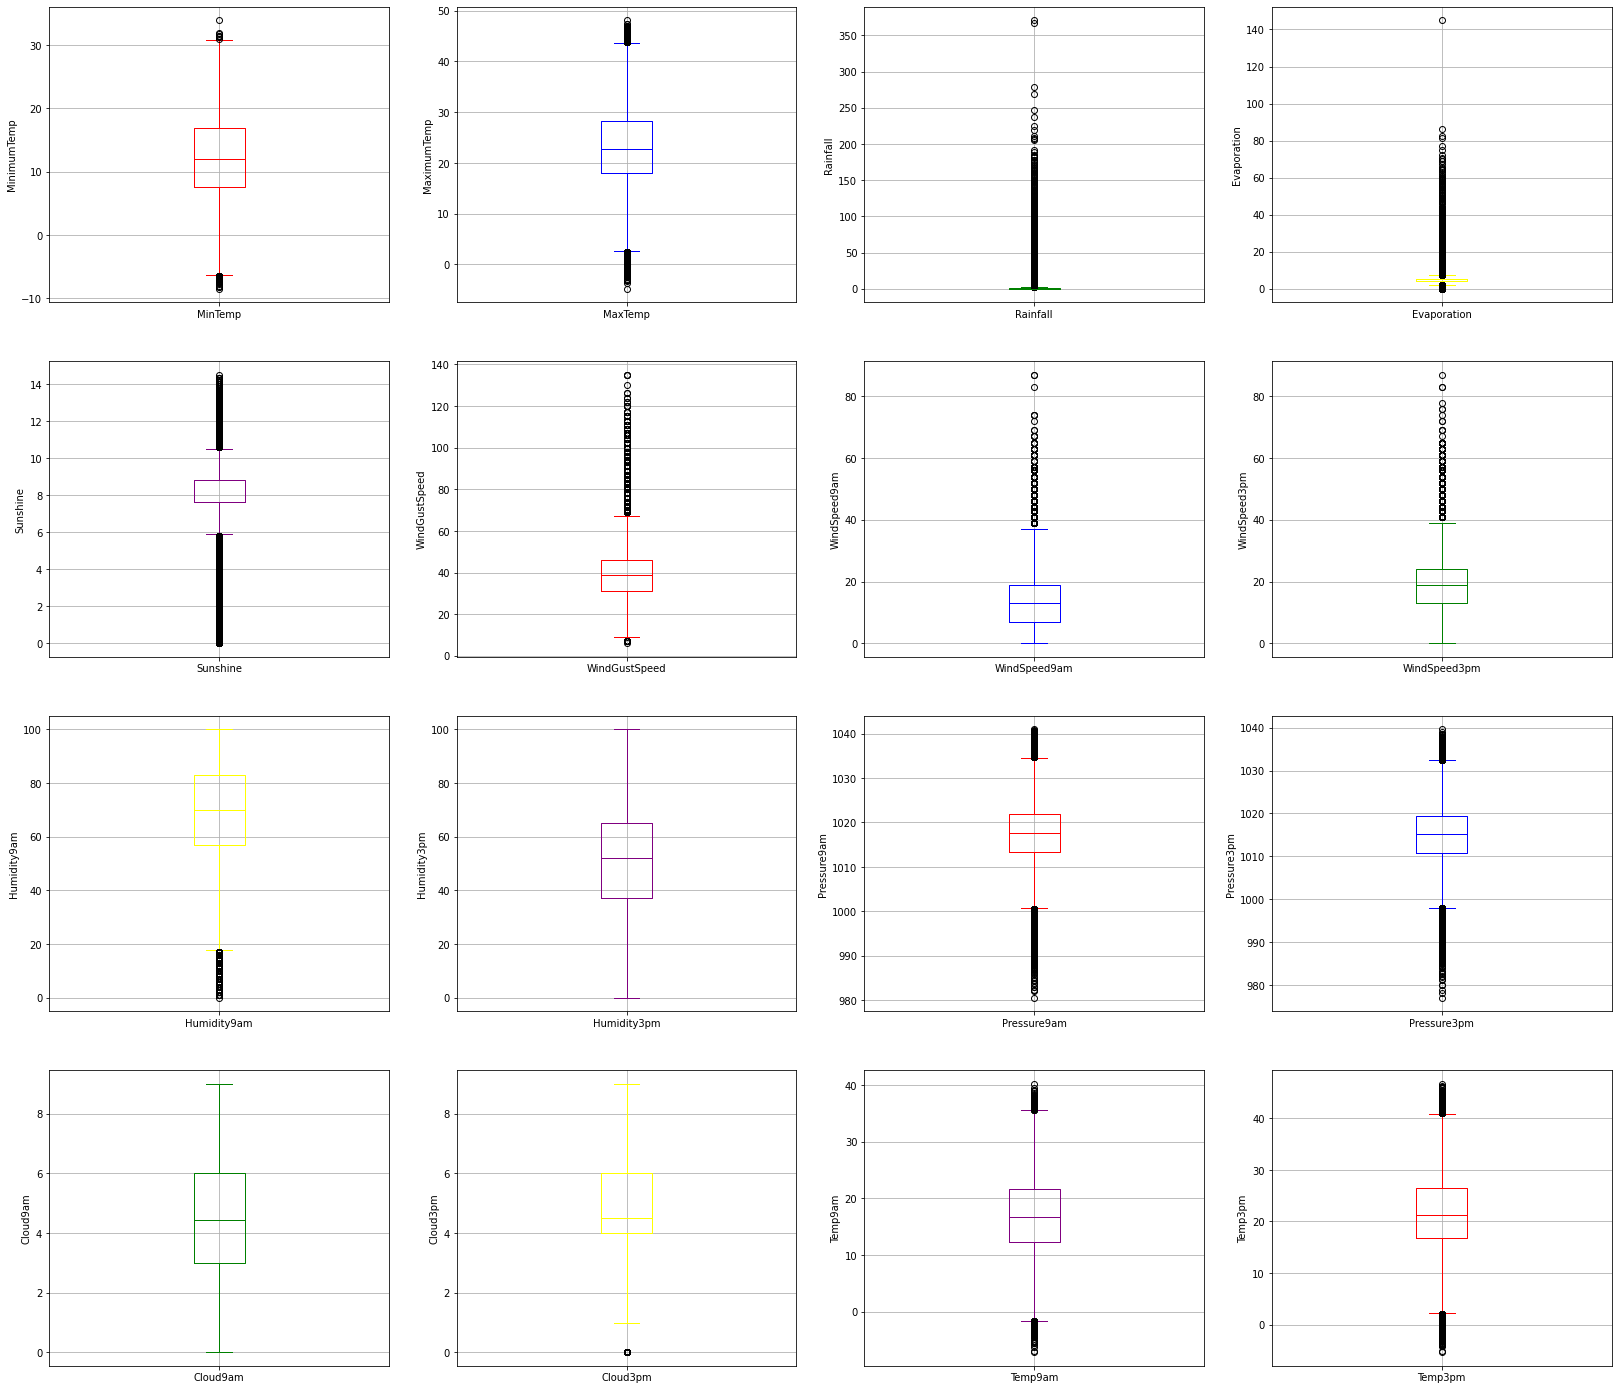

In [53]:
plt.figure(figsize=(28,25))

plt.subplot(4, 4, 1)
fig = data_read.boxplot(column='MinTemp',color="red")
fig.set_ylabel('MinimumTemp')

plt.subplot(4, 4, 2)
fig = data_read.boxplot(column='MaxTemp',color='blue')
fig.set_ylabel('MaximumTemp')

plt.subplot(4, 4, 3)
fig = data_read.boxplot(column='Rainfall',color='green')
fig.set_ylabel('Rainfall')

plt.subplot(4, 4, 4)
fig = data_read.boxplot(column='Evaporation',color='yellow')
fig.set_ylabel('Evaporation')

plt.subplot(4, 4, 5)
fig = data_read.boxplot(column='Sunshine',color='purple')
fig.set_ylabel('Sunshine')

plt.subplot(4, 4, 6)
fig = data_read.boxplot(column='WindGustSpeed',color='red')
fig.set_ylabel('WindGustSpeed')

plt.subplot(4, 4, 7)
fig = data_read.boxplot(column='WindSpeed9am',color='blue')
fig.set_ylabel('WindSpeed9am')

plt.subplot(4, 4, 8)
fig = data_read.boxplot(column='WindSpeed3pm',color='green')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(4, 4, 9)
fig = data_read.boxplot(column='Humidity9am',color='yellow')
fig.set_ylabel('Humidity9am')

plt.subplot(4, 4, 10)
fig = data_read.boxplot(column='Humidity3pm',color='purple')
fig.set_ylabel('Humidity3pm')

plt.subplot(4, 4, 11)
fig = data_read.boxplot(column='Pressure9am',color='red')
fig.set_ylabel('Pressure9am')

plt.subplot(4, 4, 12)
fig = data_read.boxplot(column='Pressure3pm',color='blue')
fig.set_ylabel('Pressure3pm')

plt.subplot(4, 4, 13)
fig = data_read.boxplot(column='Cloud9am',color='green')
fig.set_ylabel('Cloud9am')

plt.subplot(4, 4, 14)
fig = data_read.boxplot(column='Cloud3pm',color='yellow')
fig.set_ylabel('Cloud3pm')

plt.subplot(4, 4, 15)
fig = data_read.boxplot(column='Temp9am',color='purple')
fig.set_ylabel('Temp9am')

plt.subplot(4, 4, 16)
fig = data_read.boxplot(column='Temp3pm',color='red')
fig.set_ylabel('Temp3pm')

**Removing Outliers**

In [54]:
#Calculating the Z-Score of the attributes that have missing values.

data_read["z_MinTemp"] = (data_read.MinTemp - data_read.MinTemp.mean())/data_read.MinTemp.std()
data_read["z_MaxTemp"] = (data_read.MaxTemp - data_read.MaxTemp.mean())/data_read.MaxTemp.std()
data_read["z_Rainfall"] = (data_read.Rainfall - data_read.Rainfall.mean())/data_read.Rainfall.std()
data_read["z_Evaporation"] = (data_read.Evaporation - data_read.Evaporation.mean())/data_read.Evaporation.std()
data_read["z_Sunshine"] = (data_read.Sunshine - data_read.Sunshine.mean())/data_read.Sunshine.std()
data_read["z_WindGustSpeed"] = (data_read.WindGustSpeed - data_read.WindGustSpeed.mean())/data_read.WindGustSpeed.std()
data_read["z_WindSpeed9am"] = (data_read.WindSpeed9am - data_read.WindSpeed9am.mean())/data_read.WindSpeed9am.std()
data_read["z_WindSpeed3pm"] = (data_read.WindSpeed3pm - data_read.WindSpeed3pm.mean())/data_read.WindSpeed3pm.std()
data_read["z_Humidity9am"] = (data_read.Humidity9am - data_read.Humidity9am.mean())/data_read.Humidity9am.std()
data_read["z_Pressure9am"] = (data_read.Pressure9am - data_read.Pressure9am.mean())/data_read.Pressure9am.std()
data_read["z_Pressure3pm"] = (data_read.Pressure3pm - data_read.Pressure3pm.mean())/data_read.Pressure3pm.std()
data_read["z_Temp9am"] = (data_read.Temp9am - data_read.Temp9am.mean())/data_read.Temp9am.std()
data_read["z_Temp3pm"] = (data_read.Temp3pm - data_read.Temp3pm.mean())/data_read.Temp3pm.std()

In [55]:
cleaned_data = data_read[((data_read.z_MinTemp >-2) & (data_read.z_MinTemp <2))&
                   ((data_read.z_MaxTemp >-2) & (data_read.z_MaxTemp <2))&
                   ((data_read.z_Rainfall >-2) & (data_read.z_Rainfall <2))&
                   ((data_read.z_Evaporation >-2) & (data_read.z_Evaporation <2))&
                   ((data_read.z_Sunshine >-2) & (data_read.z_Sunshine <2))&
                   ((data_read.z_WindGustSpeed >-2) & (data_read.z_WindGustSpeed <2))&
                   ((data_read.z_WindSpeed9am >-2) & (data_read.z_WindSpeed9am <2))&
                    ((data_read.z_WindSpeed3pm >-2) & (data_read.z_WindSpeed3pm <2))&
                   ((data_read.z_Humidity9am >-2) & (data_read.z_Humidity9am <2))&
                   ((data_read.z_Pressure9am >-2) & (data_read.z_Pressure9am <2))&
                   ((data_read.z_Pressure3pm >-2) & (data_read.z_Pressure3pm <2))&
                   ((data_read.z_Temp9am >-2) & (data_read.z_Temp9am <2))&
                   ((data_read.z_Temp3pm >-2) & (data_read.z_Temp3pm <2))]

In [56]:
cleaned_data.drop(labels = "z_MinTemp", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_MaxTemp", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Rainfall", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Evaporation", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Sunshine", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_WindGustSpeed", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_WindSpeed9am", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_WindSpeed3pm", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Humidity9am", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Pressure9am", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Pressure3pm", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Temp9am", axis = 1, inplace = True)
cleaned_data.drop(labels = "z_Temp3pm", axis = 1, inplace = True)

In [57]:
#The shape of our dataset after removing the outliers.
cleaned_data.shape

(96999, 22)

Text(0, 0.5, 'Temp3pm')

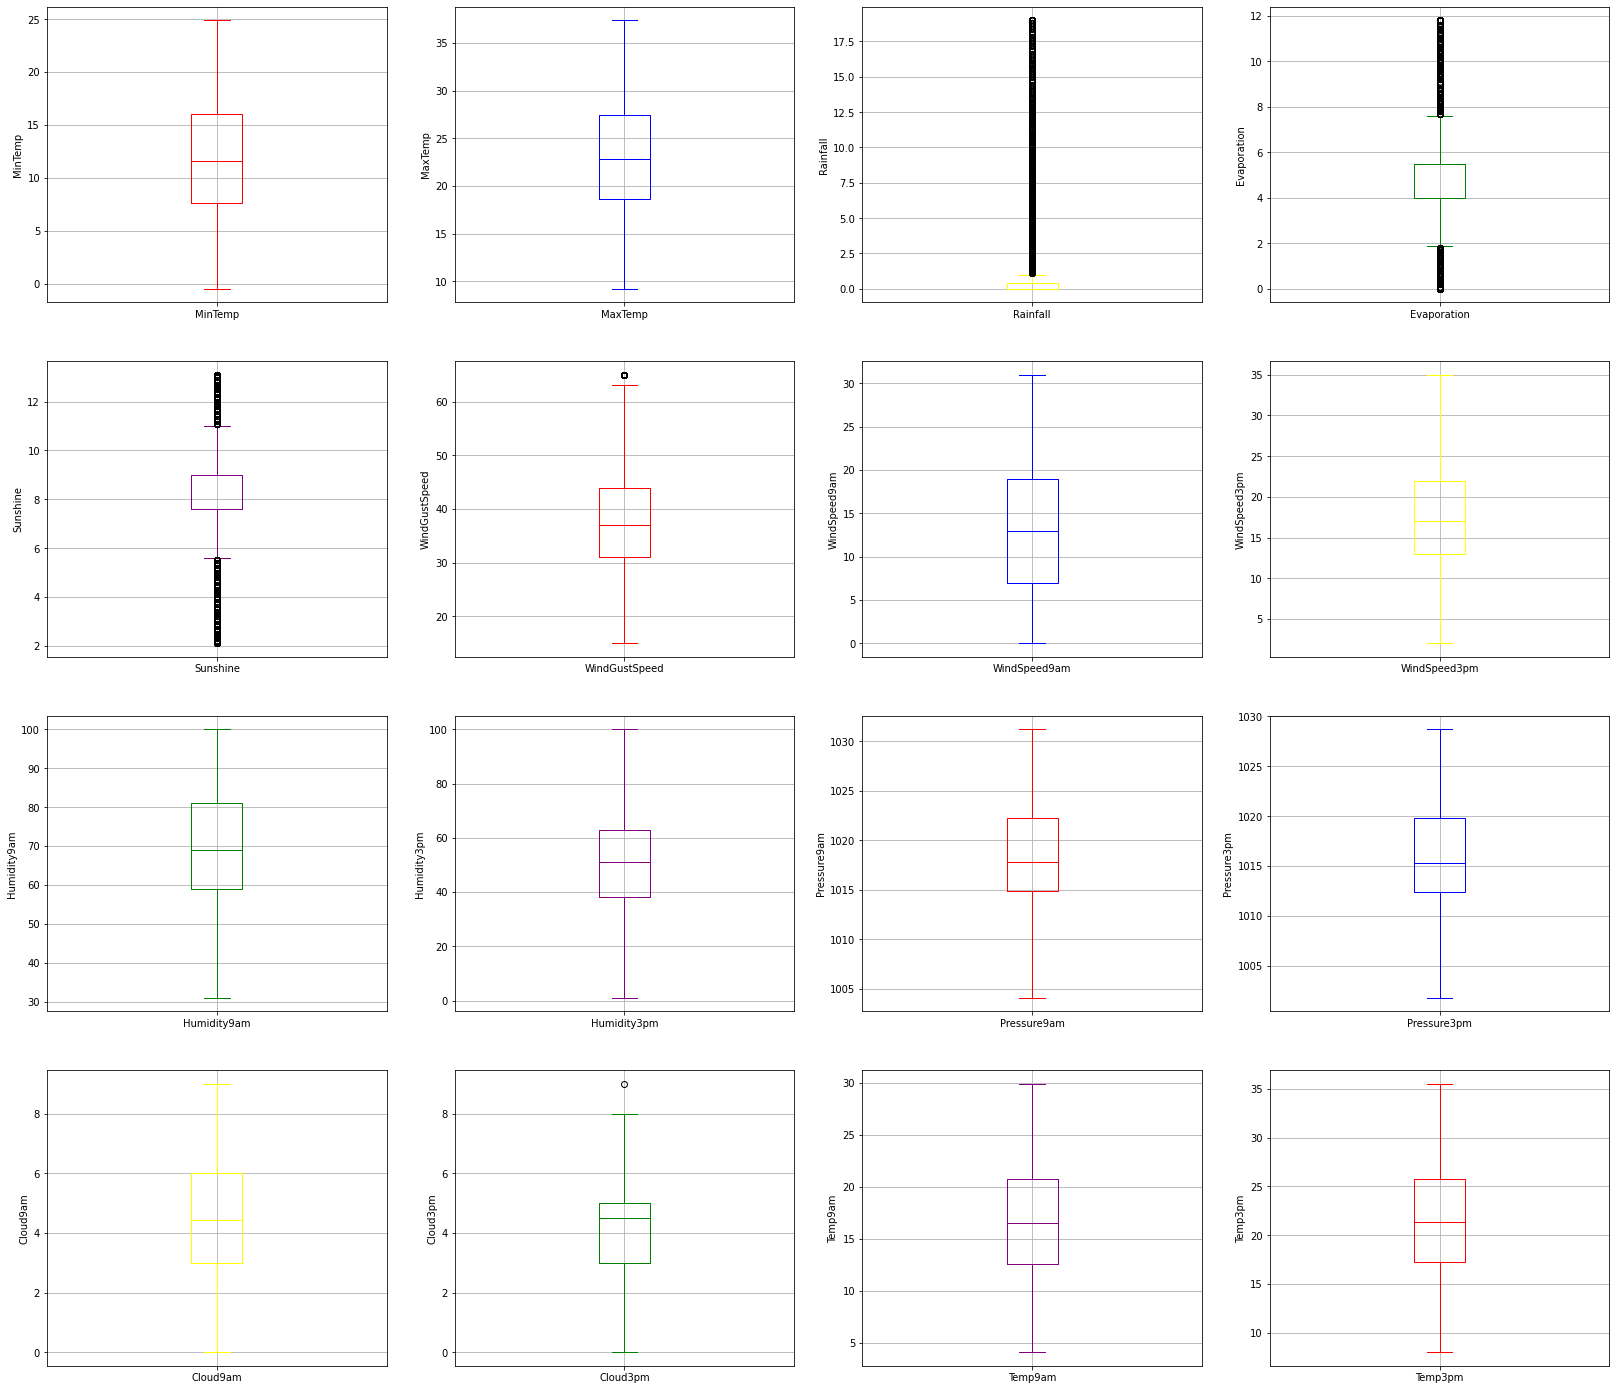

In [58]:
plt.figure(figsize=(28,25))

plt.subplot(4, 4, 1)
fig = cleaned_data.boxplot(column='MinTemp',color='red')
fig.set_ylabel('MinTemp')

plt.subplot(4, 4, 2)
fig = cleaned_data.boxplot(column='MaxTemp',color='blue')
fig.set_ylabel('MaxTemp')

plt.subplot(4, 4, 3)
fig = cleaned_data.boxplot(column='Rainfall',color='yellow')
fig.set_ylabel('Rainfall')

plt.subplot(4, 4, 4)
fig = cleaned_data.boxplot(column='Evaporation',color='green')
fig.set_ylabel('Evaporation')

plt.subplot(4, 4, 5)
fig = cleaned_data.boxplot(column='Sunshine',color='purple')
fig.set_ylabel('Sunshine')

plt.subplot(4, 4, 6)
fig = cleaned_data.boxplot(column='WindGustSpeed',color='red')
fig.set_ylabel('WindGustSpeed')

plt.subplot(4, 4, 7)
fig = cleaned_data.boxplot(column='WindSpeed9am',color='blue')
fig.set_ylabel('WindSpeed9am')

plt.subplot(4, 4, 8)
fig = cleaned_data.boxplot(column='WindSpeed3pm',color='yellow')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(4, 4, 9)
fig = cleaned_data.boxplot(column='Humidity9am',color='green')
fig.set_ylabel('Humidity9am')

plt.subplot(4, 4, 10)
fig = cleaned_data.boxplot(column='Humidity3pm',color='purple')
fig.set_ylabel('Humidity3pm')

plt.subplot(4, 4, 11)
fig = cleaned_data.boxplot(column='Pressure9am',color='red')
fig.set_ylabel('Pressure9am')

plt.subplot(4, 4, 12)
fig = cleaned_data.boxplot(column='Pressure3pm',color='blue')
fig.set_ylabel('Pressure3pm')

plt.subplot(4, 4, 13)
fig = cleaned_data.boxplot(column='Cloud9am',color='yellow')
fig.set_ylabel('Cloud9am')

plt.subplot(4, 4, 14)
fig = cleaned_data.boxplot(column='Cloud3pm',color='green')
fig.set_ylabel('Cloud3pm')

plt.subplot(4, 4, 15)
fig = cleaned_data.boxplot(column='Temp9am',color='purple')
fig.set_ylabel('Temp9am')

plt.subplot(4, 4, 16)
fig = cleaned_data.boxplot(column='Temp3pm',color='red')
fig.set_ylabel('Temp3pm')

**CORRELATION ANALYSIS**

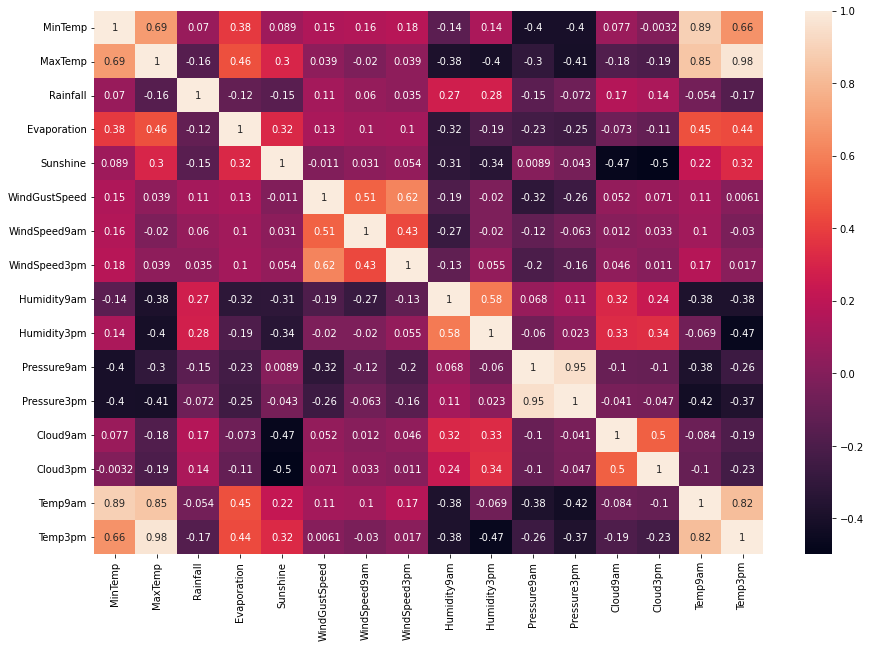

In [59]:
plt.figure(figsize = (15,10))
sns.heatmap(cleaned_data.corr(), annot = True)

In [60]:
cleaned_data.drop(labels = ["Temp9am", "Temp3pm", "Pressure3pm"], axis = 1, inplace = True)

In [61]:
cleaned_data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [62]:
cleaned_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
cleaned_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [63]:
cleaned_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.466568  7.616019           W   
1   Albury      7.4     25.1       0.0     5.466568  7.616019         WNW   
2   Albury     12.9     25.7       0.0     5.466568  7.616019         WSW   
3   Albury      9.2     28.0       0.0     5.466568  7.616019          NE   
4   Albury     17.5     32.3       1.0     5.466568  7.616019           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  RainToday  \
0         71.0         22.0       1007.7  8.000000  4.507211          0   
1         44.0         25.0       1010.6  4.444563  4.507211          0   
2         38.0         30.0       1007.6  4.444563  2.000000          0   
3         45.0         16.0       1017.6  4.444563  4.507211          0   
4         82.0         33.0       1010.8  7.000000  8.000000          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0

In [64]:
import plotly.express as px

In [65]:
px.histogram(cleaned_data,
             x='Location',
             title='Location wise rainfall prediction',
             color='RainToday')

In [66]:
px.scatter(cleaned_data.sample(1000),
           title='Lowest Temp vs Highest Temp',
           color='RainToday',
           x='MinTemp',
           y='MaxTemp')

<Figure size 1.44e+06x1.44e+06 with 0 Axes>

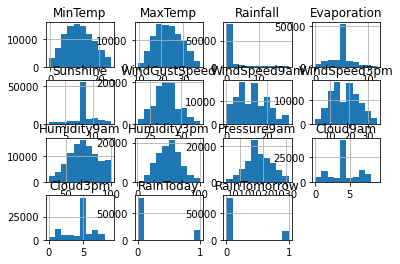

In [74]:
plt.figure(figsize = (20000,20000))
cleaned_data.hist()
plt.show()

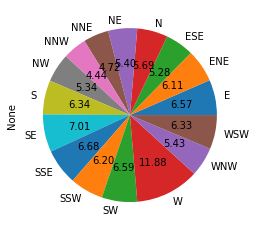

In [75]:
cleaned_data.groupby("WindGustDir").size().plot(kind='pie', autopct='%.2f')

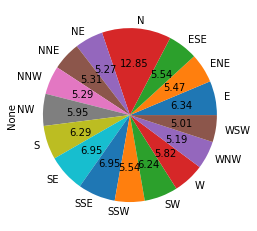

In [76]:
cleaned_data.groupby("WindDir9am").size().plot(kind='pie', autopct='%.2f')

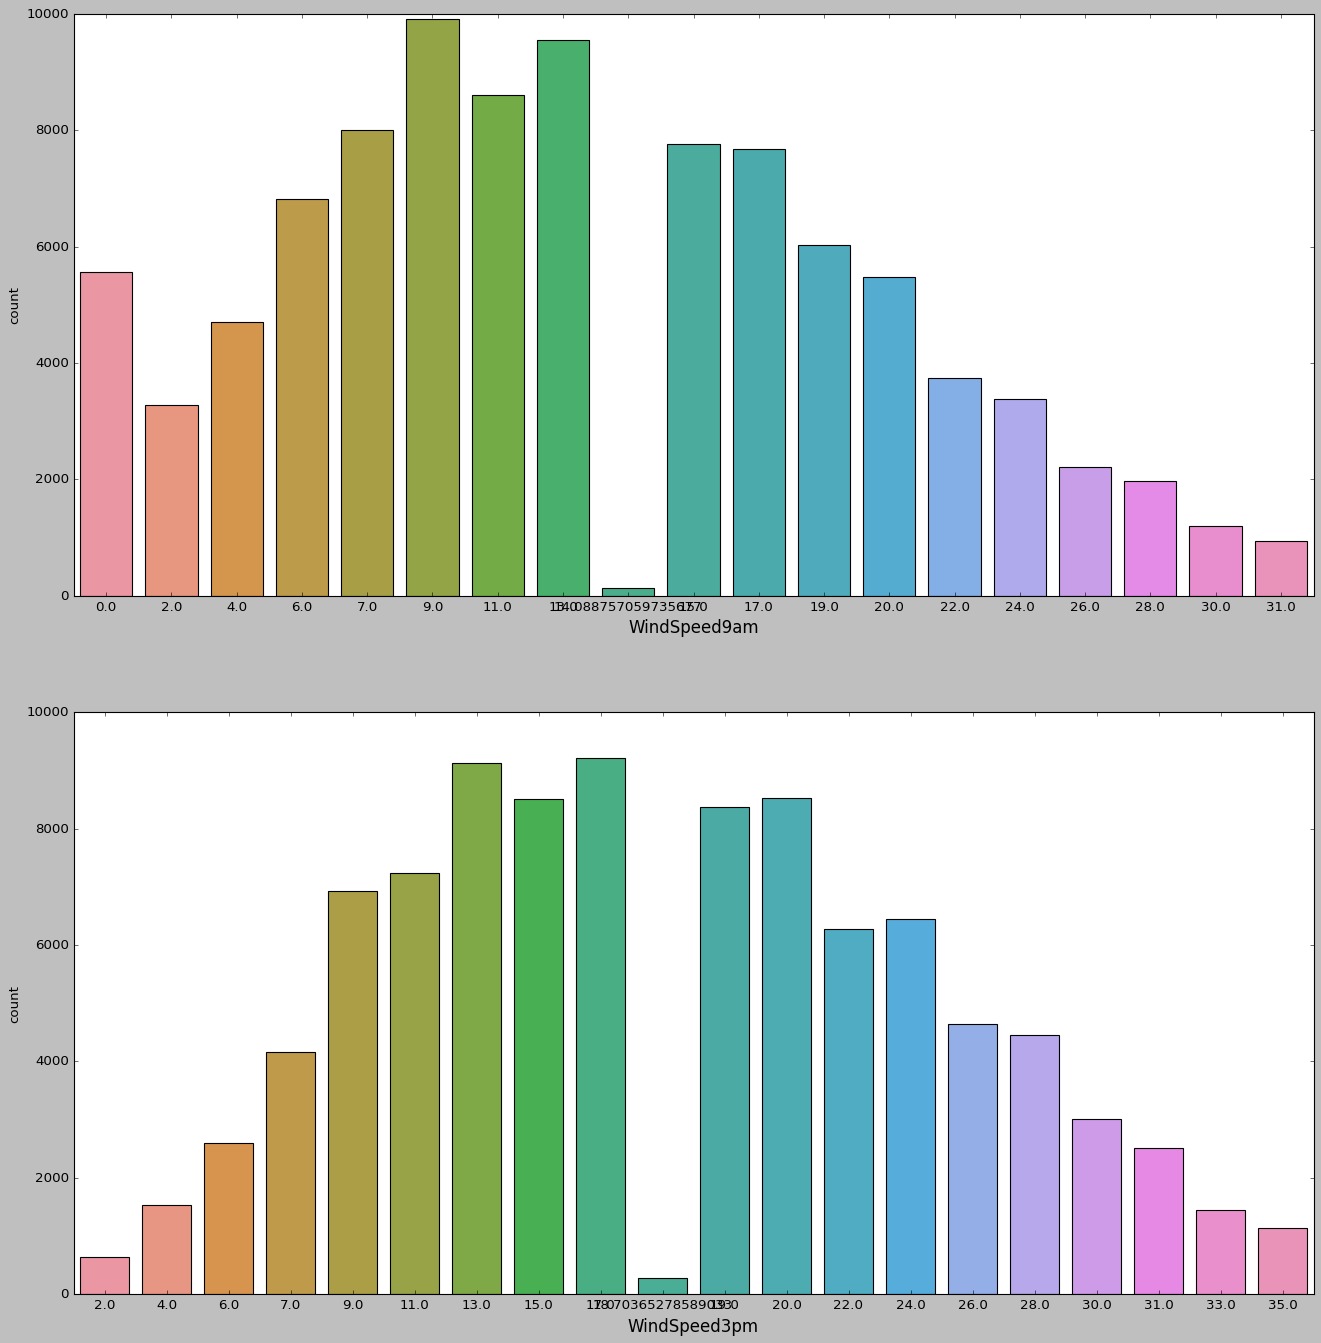

In [77]:
plt.style.use("classic")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.countplot(cleaned_data['WindSpeed9am'], ax=ax[0])
ax[0].set_xlabel("WindSpeed9am",fontsize=15)

sns.countplot(cleaned_data['WindSpeed3pm'], ax=ax[1])
ax[1].set_xlabel("WindSpeed3pm",fontsize=15);


Wind speed at 9am is usually around 9km/hr

Wind speed at 3pm is usually around 17km/hr

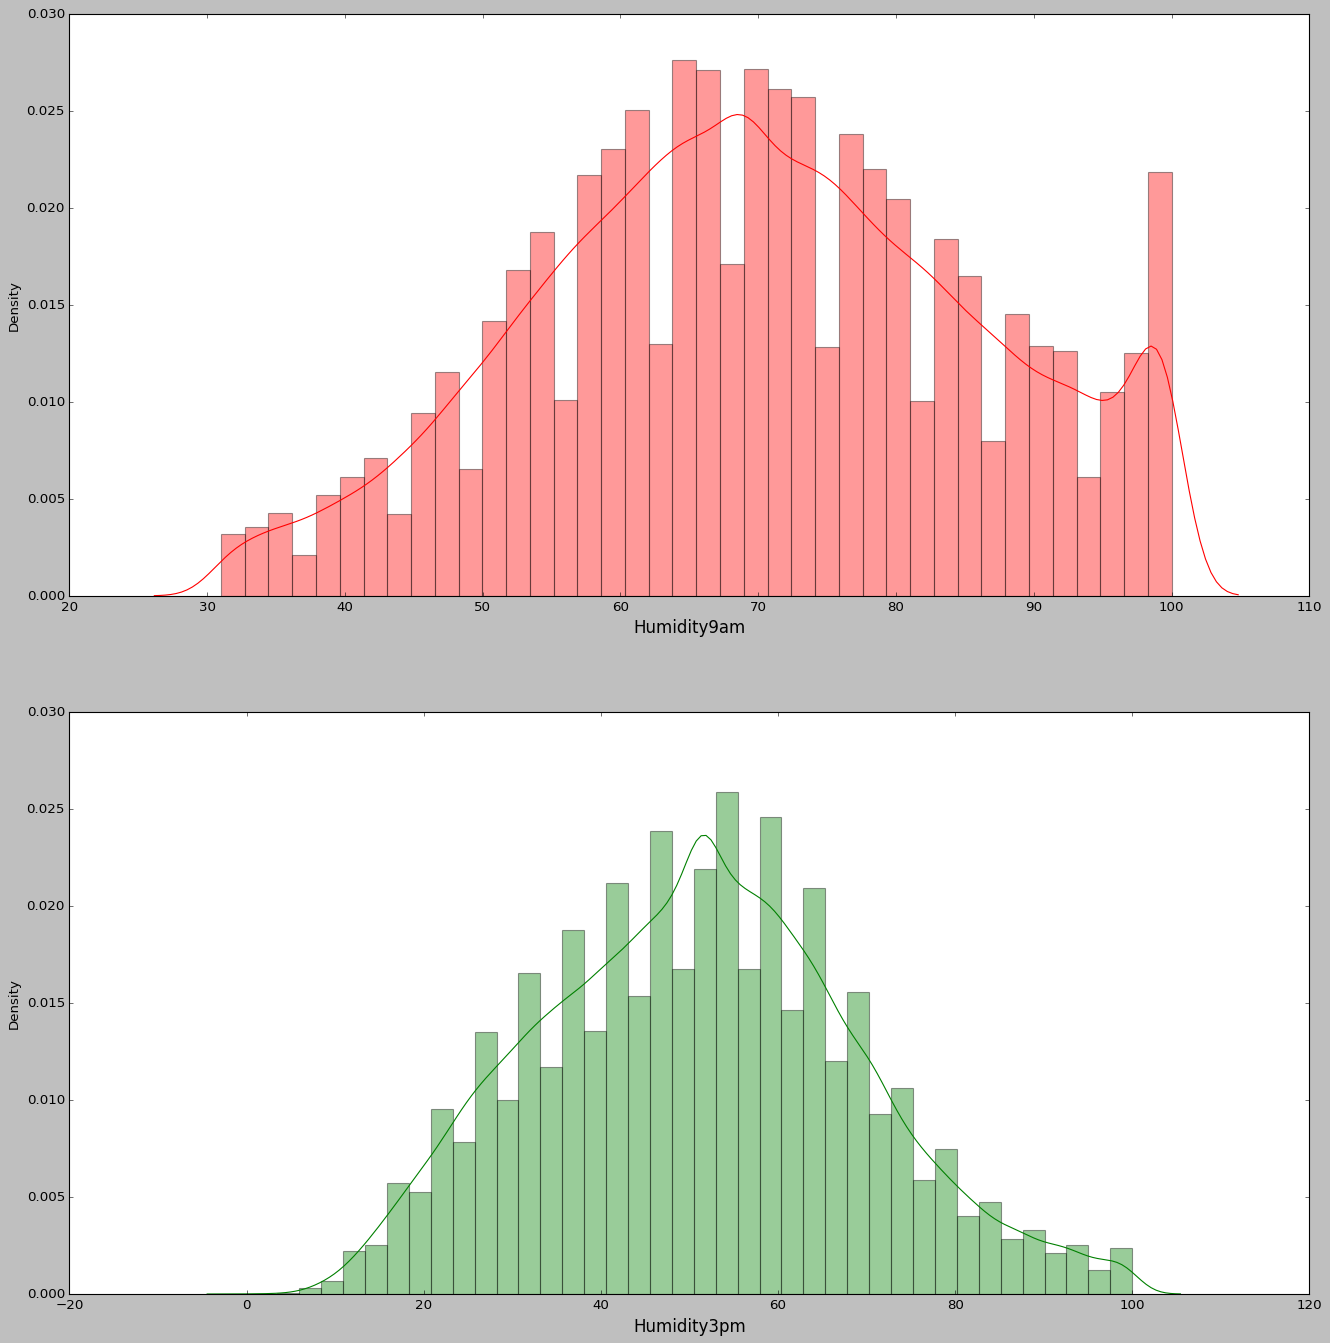

In [79]:
plt.style.use("classic")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.distplot(cleaned_data['Humidity9am'], ax=ax[0], color="red", bins=40)
ax[0].set_xlabel("Humidity9am",fontsize=15)

sns.distplot(cleaned_data['Humidity3pm'], ax=ax[1], color="green", bins=40);
ax[1].set_xlabel("Humidity3pm",fontsize=15);

In [80]:
x = cleaned_data.iloc[:,:-1]
y = cleaned_data.iloc[:,-1]

In [81]:
x.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.466568  7.616019           W   
1   Albury      7.4     25.1       0.0     5.466568  7.616019         WNW   
2   Albury     12.9     25.7       0.0     5.466568  7.616019         WSW   
3   Albury      9.2     28.0       0.0     5.466568  7.616019          NE   
4   Albury     17.5     32.3       1.0     5.466568  7.616019           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  RainToday  
0         71.0         22.0       1007.7  8.000000  4.507211          0  
1         44.0         25.0       1010.6  4.444563  4.507211          0  
2         38.0         30.0       1007.6  4.444563  2.000000          0  
3         45.0         16.0       1017.6  4.444563  4.507211          0  
4         82.0         33.0       1010.8  7.000000  8.000000          0

In [82]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [84]:
print (x.shape, X_train.shape, X_test.shape, y.shape,Y_train.shape, Y_test.shape )

(96999, 18) (67899, 18) (29100, 18) (96999,) (67899,) (29100,)


**DUMMY VARIBALE ENCODING**

In [85]:
X_train_dummy = pd.get_dummies(X_train,columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],drop_first=True)
X_test_dummy = pd.get_dummies(X_test,columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],drop_first=True)


In [86]:
X_train_dummy.head()

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
56683      0.1     15.7       0.0     5.466568   7.616019      20.000000   
44795     12.5     18.1       6.6     5.466568   7.616019      57.000000   
4070      15.7     29.3       3.2     5.466568   7.616019      48.000000   
37175      4.5     22.4       0.0     3.800000  11.000000      26.000000   
46999      7.7     20.8       0.0     4.800000   9.300000      40.001532   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
56683           0.0           9.0         99.0         47.0       1025.0   
44795          19.0          30.0         78.0         73.0       1007.7   
4070           20.0          17.0         49.0         43.0       1007.1   
37175           7.0           4.0         78.0         46.0       1025.1   
46999           9.0          11.0         68.0         39.0       1022.7   

       Cloud9am  Cloud3pm  RainToday  Location_Albany  Location_Albury  \
56683  4.444563  4.507211          0                0                0   
44795  8.000000  8.000000          1                0                0   
4070   4.444563  4.507211          1                0                0   
37175  1.000000  1.000000          0                0                0   
46999  6.000000  5.000000          0                0                0   

       Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
56683                      0                       0                  1   
44795                      0                       0                  0   
4070                       0                       1                  0   
37175                      0                       0                  0   
46999                      0                       0                  0   

       Location_Bendigo  Location_Brisbane  Location_Cairns  \
56683                 0                  0                0   
44795                 0                  0                0   
4070                  0                  0                0   
37175                 0                  0                0   
46999                 0                  0                0   

       Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
56683                  0               0                      0   
44795                  0               0                      0   
4070                   0               0                      0   
37175                  0               0                      0   
46999                  1               0                      0   

       Location_Dartmoor  Location_Darwin  Location_GoldCoast  \
56683                  0                0                   0   
44795                  0                0                   0   
4070                   0                0                   0   
37175                  0                0                   0   
46999                  0                0                   0   

       Location_Hobart  Location_Katherine  Location_Launceston  \
56683                0                   0                    0   
44795                0                   0                    0   
4070                 0                   0                    0   
37175                0                   0                    0   
46999                0                   0                    0   

       Location_Melbourne  Location_MelbourneAirport  Location_Mildura  \
56683                   0                          0                 0   
44795                   0                          0                 0   
4070                    0                          0                 0   
37175                   0                          0                 0   
46999                   0                          0                 0   

       Location_Moree  Location_MountGambier  Location_MountGinini  \
56683               0                      0                     0   
44795               0               

In [87]:
X_test_dummy.head()

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
94240      14.3     28.7       0.0     6.000000   9.400000           35.0   
125369      6.8     18.9       0.0     5.466568   7.616019           28.0   
56109       3.1     18.0       0.0     5.466568   7.616019           37.0   
89232      21.2     29.5       0.0     7.400000  10.200000           37.0   
38711      13.2     30.6       0.0     8.800000  10.700000           48.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
94240           24.0          15.0         47.0         24.0  1018.400000   
125369          13.0          15.0         65.0         60.0  1017.648376   
56109           13.0          22.0         71.0         50.0  1023.200000   
89232           17.0          24.0         59.0         55.0  1018.100000   
38711           24.0          19.0         57.0         34.0  1021.700000   

        Cloud9am  Cloud3pm  RainToday  Location_Albany  Location_Albury  \
94240   1.000000  1.000000          0                0                0   
125369  4.444563  4.507211          0                0                0   
56109   6.000000  1.000000          0                0                0   
89232   3.000000  1.000000          0                0                0   
38711   1.000000  2.000000          0                0                0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
94240                       0                       0                  0   
125369                      0                       0                  0   
56109                       0                       0                  1   
89232                       0                       0                  0   
38711                       0                       0                  0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
94240                  0                  0                0   
125369                 0                  0                0   
56109                  0                  0                0   
89232                  0                  0                1   
38711                  0                  0                0   

        Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
94240                   0               0                      0   
125369                  0               0                      0   
56109                   0               0                      0   
89232                   0               0                      0   
38711                   0               0                      0   

        Location_Dartmoor  Location_Darwin  Location_GoldCoast  \
94240                   0                0                   0   
125369                  0                0                   0   
56109                   0                0                   0   
89232                   0                0                   0   
38711                   0                0                   0   

        Location_Hobart  Location_Katherine  Location_Launceston  \
94240                 0                   0                    0   
125369                0                   0                    0   
56109                 0                   0                    0   
89232                 0                   0                    0   
38711                 0                   0                    0   

        Location_Melbourne  Location_MelbourneAirport  Location_Mildura  \
94240                    0                          0                 0   
125369                   0                          0                 0   
56109                    0                          0                 0   
89232                    0                          0                 0   
38711                    0                          0                 0   

        Location_Moree  Location_MountGambier  Location_MountGinini  \
94240                0                      0       

In [88]:
print (X_train_dummy.shape, X_test_dummy.shape)

(67899, 107) (29100, 107)


**Normalization**

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_X_train_dummy = scaler.fit_transform(X_train_dummy)
norm_X_test_dummy = scaler.transform(X_test_dummy)

In [90]:
Y_train.value_counts()

0    55862
1    12037
Name: RainTomorrow, dtype: int64

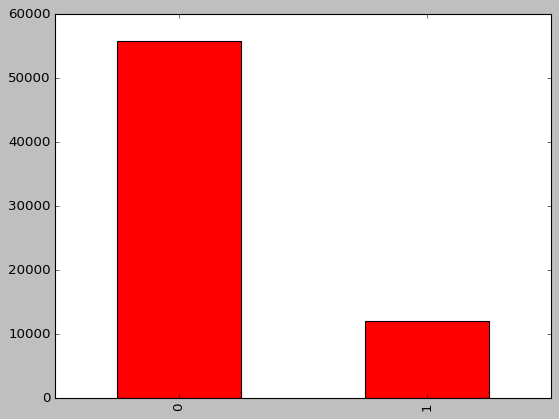

In [94]:

Y_train.value_counts().plot(kind = 'bar',color='red')

**BALANCING OUR TARGET VARIABLE THROUGH OVER SAMPLING**

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=888)
X_train_resampled, Y_train_resampled = smote.fit_resample(norm_X_train_dummy, Y_train)

**CHECKING IF OUR TARGET VARIABLE IS BALANCED OR NOT**

In [96]:
Y_train_resampled.value_counts()

0    55862
1    55862
Name: RainTomorrow, dtype: int64

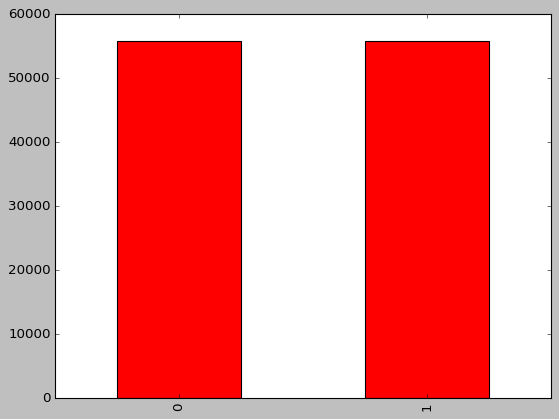

In [97]:
Y_train_resampled.value_counts().plot(kind = 'bar',color='red')

# **MACHINE LEARNING MODELS**

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

**1. Logistic Regression**

In [99]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_resampled, Y_train_resampled)
prediction_lr = logreg.predict(norm_X_test_dummy)
print ("Accuracy of the Logistic Regression is : ", accuracy_score(Y_test, prediction_lr)*100,"%")
print ('RMSE of the Logistic Regression is:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_lr)))

Accuracy of the Logistic Regression is :  77.18556701030927 %
RMSE of the Logistic Regression is: 0.4776445643958562


In [100]:
confusion_matrix(Y_test, prediction_lr)

array([[18712,  5270],
       [ 1369,  3749]])

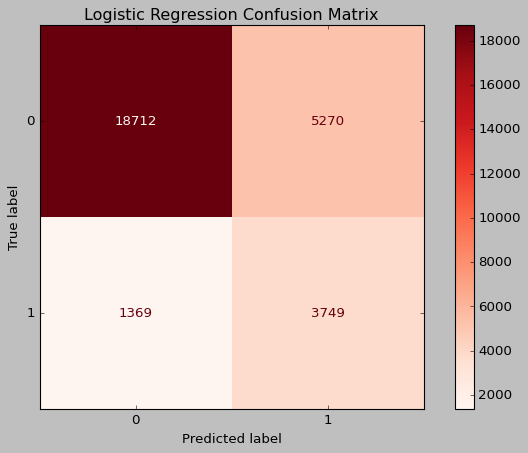

In [108]:
matrix_lr = plot_confusion_matrix(logreg, norm_X_test_dummy, Y_test, cmap=plt.cm.Reds)
matrix_lr.ax_.set_title("Logistic Regression Confusion Matrix")
plt.gcf().set_size_inches(10,6)

**2. Decision Tree**

In [104]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
dectree.fit(X_train_resampled, Y_train_resampled)
prediction_dt = dectree.predict(norm_X_test_dummy)
print ("Accuracy of the Decision Tree Classifier is : ", accuracy_score(Y_test, prediction_dt)*100,"%")
print ('RMSE of the Decision Tree Classifier is :', np.sqrt(metrics.mean_squared_error(Y_test, prediction_dt)))

Accuracy of the Decision Tree Classifier is :  78.28865979381443 %
RMSE of the Decision Tree Classifier is : 0.4659542918161133


In [105]:
confusion_matrix(Y_test, prediction_dt)

array([[20325,  3657],
       [ 2661,  2457]])

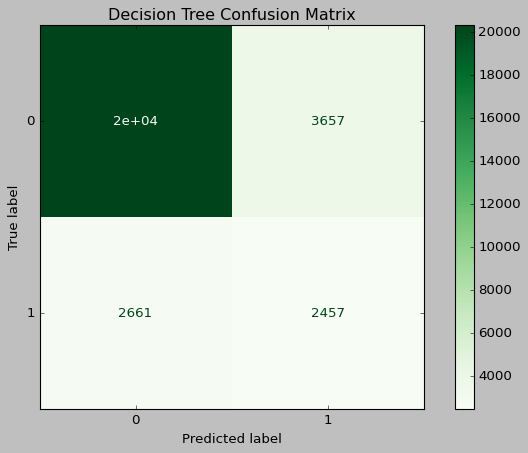

In [107]:
matrix_lr = plot_confusion_matrix(dectree, norm_X_test_dummy, Y_test, cmap=plt.cm.Greens)
matrix_lr.ax_.set_title("Decision Tree Confusion Matrix")
plt.gcf().set_size_inches(10,6)

**3. XG Boost**

In [109]:
import xgboost as xgb

xg_class = xgb.XGBClassifier()
xg_class.fit(X_train_resampled, Y_train_resampled)
prediction_xg = xg_class.predict(norm_X_test_dummy)
print ("Accuracy of the XGBoost classifier is : ", accuracy_score(Y_test, prediction_xg),"%")
print ('RMSE of the XGBoost classifier is:', np.sqrt(metrics.mean_squared_error(Y_test, prediction_xg)))

Accuracy of the XGBoost classifier is :  0.8258762886597938 %
RMSE of the XGBoost classifier is: 0.4172813335631085


In [110]:
confusion_matrix(Y_test, prediction_xg)

array([[20946,  3036],
       [ 2031,  3087]])

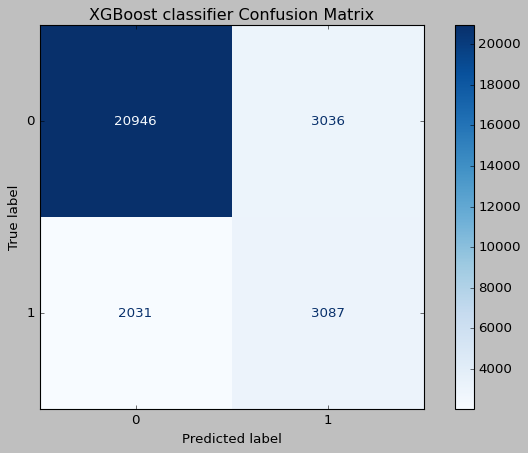

In [114]:
matrix_lr = plot_confusion_matrix(xg_class, norm_X_test_dummy, Y_test, cmap=plt.cm.Blues)
matrix_lr.ax_.set_title("XGBoost classifier Confusion Matrix")
plt.gcf().set_size_inches(10,6)